In [ ]:
pip install spotipy

     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 153kB 36.9MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
pip install bs4

In [ ]:
pip install texthero

     |████████████████████████████████| 245kB 10.1MB/s 
     |████████████████████████████████| 1.5MB 13.4MB/s 
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 7.7MB/s 


In [ ]:
import texthero as hero
from texthero import preprocessing
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('popular')
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import requests
from bs4 import BeautifulSoup

In [ ]:
cid = '9d5e560f8923411ca7d8bc67acaaa1bb'
secret = 'a664181acffd4a6eb3d05fecbd144b74'
username = 'stealthforce10'
redirect_uri = 'http://localhost'

In [ ]:
import argparse
import pprint
import sys
import os
import subprocess
import json
import spotipy
import spotipy.util as util
import pandas as pd
import time
from spotipy.oauth2 import SpotifyClientCredentials


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)


def show_tracks(tracks):
    for i, item in enumerate(tracks['items']):
        track = item['track']
        print (" %d %s %s" % (i, track['artists'][0]['name'],track['name']))

def get_track_features(track_id,sp):
    if track_id is None:
        return None
    else:
        features = sp.audio_features([track_id])
    return features

def get_features(tracks,sp):
    tracks_with_features=[]

    for track in tracks:
        features = get_track_features(track['id'],sp)
        print (track['name'])
        if not features:
            print("passing track %s" % track['name'])
            pass
        else:
            f = features[0]
            tracks_with_features.append(dict(
                                            name=track['name'],
                                            artist=track['artist'],
                                            id=track['id'],
                                            danceability=f['danceability'],
                                            energy=f['energy'],
                                            loudness=f['loudness'],
                                            speechiness=f['speechiness'],
                                            acousticness=f['acousticness'],
                                            tempo=f['tempo'],
                                            liveness=f['liveness'],
                                            valence=f['valence']
                                            ))

        # time.sleep(0.1)

    # print(tracks_with_features[0])
    return tracks_with_features

def get_tracks_from_playlists(username, sp):
    playlists = sp.user_playlists(username)
    trackList = []
    for playlist in playlists['items']:
        if playlist['owner']['id'] == username:
            print (playlist['name'],' no. of tracks: ',playlist['tracks']['total'])
            results = sp.user_playlist(username, playlist['id'],fields="tracks,next")
            tracks = results['tracks']
            for i, item in enumerate(tracks['items']):
                track = item['track']
                trackList.append(dict(name=track['name'], id=track['id'], artist=track['artists'][0]['name']))

    # print(trackList[0])
    return trackList

def write_to_csv(track_features):
    df = pd.DataFrame(track_features)
    df.drop_duplicates(subset=['name','artist'])
    print ('Total tracks in data set', len(df))
    df.to_csv('mySongsDataset.csv',index=False)

def main(username):
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
    print ("Getting user tracks from playlists")
    tracks = get_tracks_from_playlists(username, sp)
    print ("Getting track audio features")
    tracks_with_features = get_features(tracks,sp)
    print ("Storing into csv")
    write_to_csv(tracks_with_features)


if __name__ == '__main__':
    print ('Starting...')
    main('stealthforce10')

Starting...
Getting user tracks from playlists
My Shazam Tracks  no. of tracks:  0
Getting track audio features
Storing into csv
Total tracks in data set 0


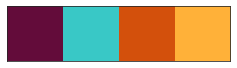

In [ ]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
# Import my spotify data
songs = pd.read_csv("mySongsDataset.csv")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          50 non-null     object 
 1   artist        50 non-null     object 
 2   id            50 non-null     object 
 3   danceability  50 non-null     float64
 4   energy        50 non-null     float64
 5   loudness      50 non-null     float64
 6   speechiness   50 non-null     float64
 7   acousticness  50 non-null     float64
 8   tempo         50 non-null     float64
 9   liveness      50 non-null     float64
 10  valence       50 non-null     float64
dtypes: float64(8), object(3)
memory usage: 4.4+ KB


In [ ]:
songs = songs.drop(['energy','valence','tempo'],axis=1)
songs.head()

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness
0,Lights,BTS,44vXWYTcdrejrIQZEoHzl8,0.625,-5.115,0.0302,0.1120,0.1050
1,Euphoria,BTS,3p6hnejEQYXkiTO1lAzVc0,0.637,-4.519,0.0338,0.3940,0.0921
2,Terrible Things - EP Version,Mayday Parade,3ZjnFYlal0fXN6t61wdxhl,0.285,-6.833,0.0295,0.6980,0.1040
3,Just the Way You Are,Bruno Mars,7BqBn9nzAq8spo5e7cZ0dJ,0.637,-5.413,0.0432,0.0151,0.0876
4,Somebody Else,The 1975,4m0q0xQ2BNl9SCAGKyfiGZ,0.618,-5.711,0.0601,0.2040,0.1260


In [ ]:
songs.describe()

,danceability,loudness,speechiness,acousticness,liveness
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.608680,-6.612340,0.103842,0.277761,0.148242
std,0.141959,2.880664,0.108004,0.285823,0.096852
min,0.285000,-20.514000,0.023200,0.000261,0.059000
25%,0.544250,-7.289500,0.033800,0.026625,0.097475
50%,0.618000,-5.953500,0.044200,0.138500,0.114000
75%,0.713000,-4.738250,0.183500,0.432000,0.164500
max,0.918000,-3.239000,0.510000,0.886000,0.625000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f776c6ad450>,
      dtype=object)

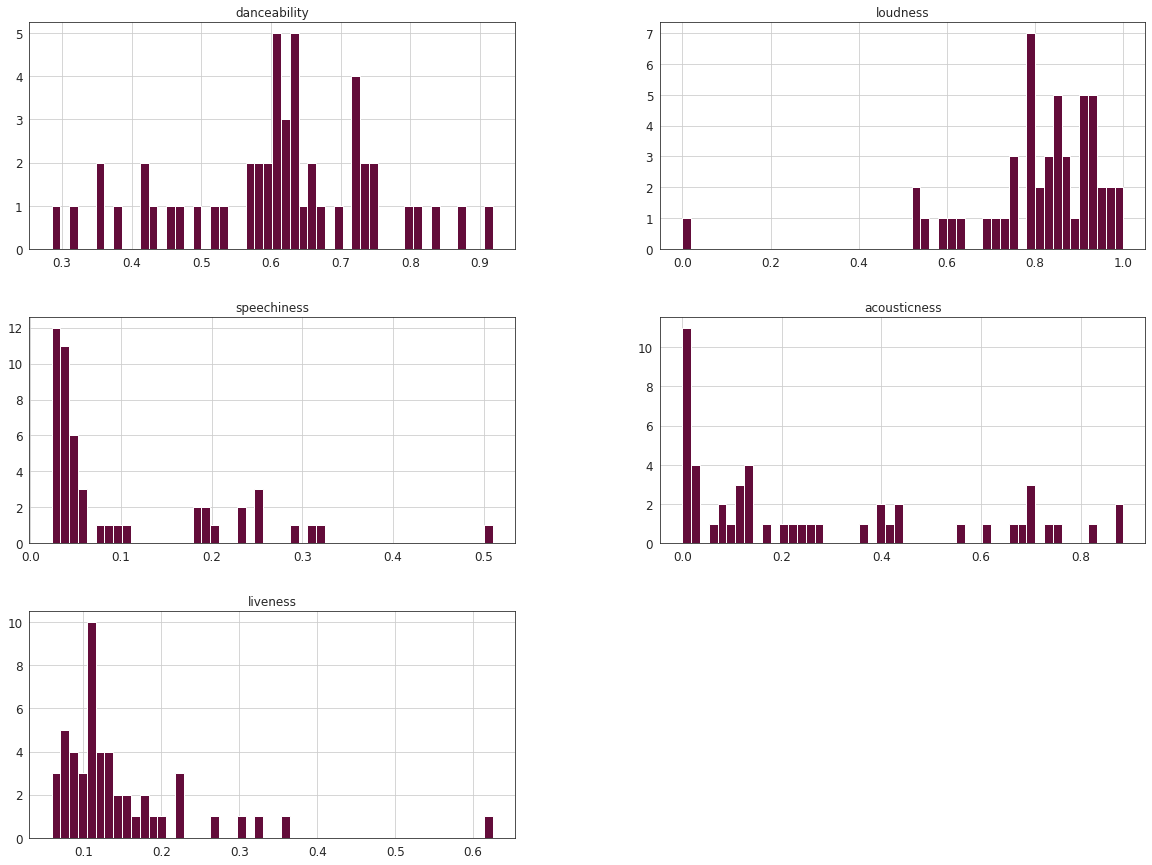

In [ ]:
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

songs.hist(bins=50,figsize=(20,15))

In [ ]:
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id'],axis=1)

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4998146408503578)
For n_clusters = 3, silhouette score is 0.35382190498186394)
For n_clusters = 4, silhouette score is 0.3560513796978331)
For n_clusters = 5, silhouette score is 0.3374864087970934)
For n_clusters = 6, silhouette score is 0.2736202229533443)
For n_clusters = 7, silhouette score is 0.3278869367021002)
For n_clusters = 8, silhouette score is 0.30947267900313574)
For n_clusters = 9, silhouette score is 0.3444470035668751)
For n_clusters = 10, silhouette score is 0.3449084876512527)
For n_clusters = 11, silhouette score is 0.32102643240068274)
For n_clusters = 12, silhouette score is 0.2657631123305192)
For n_clusters = 13, silhouette score is 0.280534718077855)
For n_clusters = 14, silhouette score is 0.2724609159046794)


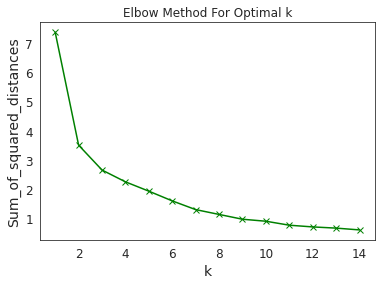

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

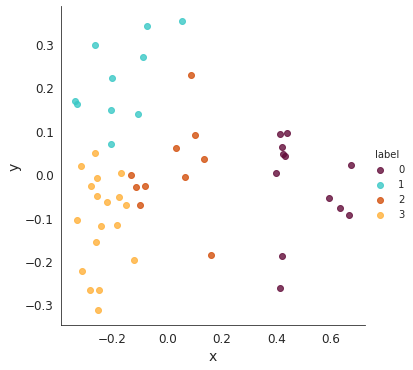

In [ ]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

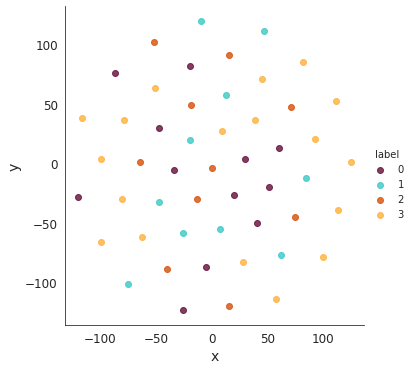

In [ ]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [ ]:
pca.explained_variance_ratio_

array([0.63808564, 0.16513118])

In [ ]:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability  loudness  speechiness  acousticness  liveness
PC-1     -0.055523 -0.399367    -0.076474       0.90550 -0.107910
PC-2      0.827462  0.025016     0.516853       0.12658  0.177542


In [ ]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

3    18
0    12
2    10
1    10
Name: label, dtype: int64

In [ ]:
songs[songs['label'] == 0].tail(12)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
43,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,0.358,0.759247,0.0590,0.695,0.0902,0
28,One,Ed Sheeran,5TvFfDlVoUWZvfqrhTJzD7,0.464,0.543792,0.0418,0.877,0.0789,0
2,Terrible Things - EP Version,Mayday Parade,3ZjnFYlal0fXN6t61wdxhl,0.285,0.791954,0.0295,0.698,0.1040,0
6,Best Friend,Jason Chen,1CKIgidUyOu2MjDwcd4xVd,0.637,0.784370,0.0409,0.740,0.2270,0
42,Tum Tak,A.R. Rahman,1wnozUBSe7OMpmZiTPJC5j,0.720,0.621766,0.0491,0.676,0.0679,0
46,The A Team,Ed Sheeran,1VdZ0vKfR5jneCmWIUAMxK,0.642,0.613372,0.0367,0.669,0.1800,0
29,Two Again,Christian Burrows,6BpmUtZ0zPlqYSCFoPfEvb,0.597,0.848683,0.1980,0.755,0.1100,0
32,"I See Fire - From ""The Hobbit - The Desolation...",Ed Sheeran,3B7udSGy2PfgoCniMSb523,0.581,0.000000,0.0397,0.559,0.0718,0
36,Photograph,Ed Sheeran,1HNkqx9Ahdgi1Ixy2xkKkL,0.614,0.580839,0.0476,0.607,0.0986,0
34,Firefly,Ed Sheeran,7udHOd6OUjUIhSjpTo4cl4,0.602,0.523589,0.0373,0.886,0.1050,0


In [ ]:
songs[songs['label']==1].head(10)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
8,Green Lights,NF,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.934298,0.2360,0.12300,0.106,1
37,PAID MY DUES,NF,18czZN7uruOjftj71Kt8oj,0.812,0.943907,0.2480,0.13600,0.109,1
12,Leave Me Alone,NF,3EtyEzMpfKSaoVhPunvbRV,0.722,0.972156,0.1900,0.24900,0.151,1
30,"Lose Yourself - From ""8 Mile"" Soundtrack",Eminem,7w9bgPAmPTtrkt2v16QWvQ,0.701,0.923878,0.2550,0.00971,0.361,1
23,I Found A Girl,The Vamps,7I8EGPtqTwlC0UlCAkpYtP,0.717,0.916585,0.0565,0.11800,0.274,1
18,Isis,Joyner Lucas,36TO60sxDduIsO3xH8IcUh,0.918,0.794327,0.2550,0.23400,0.227,1
9,WHY,NF,7rjGZWlqqeEMDrAabwZQhr,0.737,0.738698,0.5100,0.36800,0.306,1
27,679 (feat. Remy Boyz),Fetty Wap,5NQbUaeTEOGdD6hHcre0dZ,0.618,0.855340,0.3180,0.00256,0.625,1
11,Lucky You (feat. Joyner Lucas),Eminem,60SdxE8apGAxMiRrpbmLY0,0.876,0.904776,0.3060,0.06270,0.127,1
44,Fall,Eminem,58QhkbaAkLFnn7JwAnAato,0.830,0.856614,0.2950,0.22700,0.112,1


In [ ]:
songs[songs['label']==2].head(10)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
35,Tere Bina,A.R. Rahman,4FeczSomVWVyU4FW7xDeAI,0.744,0.743907,0.0375,0.278,0.0680,2
38,Perfect,Ed Sheeran,0tgVpDi06FyKpA1z0VMD4v,0.599,0.822113,0.0232,0.163,0.1060,2
47,I Swear This Time I Mean It,Mayday Parade,2OYTFaOB4D1bWLXaT5mrfH,0.423,0.797221,0.0278,0.426,0.0781,2
4,Somebody Else,The 1975,4m0q0xQ2BNl9SCAGKyfiGZ,0.618,0.856903,0.0601,0.204,0.1260,2
5,Closer,The Chainsmokers,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.863386,0.0338,0.414,0.1110,2
48,Love Somebody,Maroon 5,5H0ajL4EHsrcAEGESo2Lzx,0.675,0.823734,0.0365,0.134,0.1220,2
16,Remember This,NF,5dMKsEQSlR2ITYpScl7UMd,0.572,0.819219,0.2060,0.434,0.1090,2
1,Euphoria,BTS,3p6hnejEQYXkiTO1lAzVc0,0.637,0.925904,0.0338,0.394,0.0921,2
22,Skin,Rihanna,0a2JCinEvl21WeWLJBt7hM,0.637,0.791375,0.0449,0.140,0.1300,2
45,Destiny,NF,5n4ZzdO7KtpxsDpoDTa3D6,0.797,0.837048,0.2330,0.404,0.0891,2


In [ ]:
songs[songs['label']==3].head(18)

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label
20,Bed Of Roses,Bon Jovi,78ApVOpB9Sq8BZWxxURWp2,0.430,0.813198,0.0256,0.137000,0.1930,3
26,Castle on the Hill,Ed Sheeran,66qlqxhEMpSHOzjRK4il0b,0.461,0.905702,0.0989,0.023200,0.1400,3
17,No Excuses,NF,7ssFG94tZHpX9vbIFM0GVH,0.727,0.902981,0.0870,0.029100,0.0815,3
39,Mr. Brightside,The Killers,3n3Ppam7vgaVa1iaRUc9Lp,0.355,0.935109,0.0746,0.001190,0.0971,3
49,Love Story,Taylor Swift,0Uc9PhfV2oP7mhXlLux6SM,0.611,0.754153,0.0308,0.076700,0.1050,3
3,Just the Way You Are,Bruno Mars,7BqBn9nzAq8spo5e7cZ0dJ,0.637,0.874153,0.0432,0.015100,0.0876,3
10,MIC Drop (Steve Aoki Remix) [Full Length Edition],BTS,75scDPqGs75FotglJSoOI2,0.606,0.958726,0.1840,0.011400,0.2060,3
40,Enter Sandman,Metallica,1hKdDCpiI9mqz1jVHRKG0E,0.579,0.683300,0.0300,0.002060,0.0590,3
25,It's Time,Imagine Dragons,3xqF04FdMK7gpIPG3SPFpY,0.657,0.915716,0.0344,0.016800,0.1470,3
24,Super Far,LANY,15ahYSiHAIMxAnujlXVtta,0.575,0.791606,0.1820,0.098800,0.2270,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7760d85ed0>,
      dtype=object)

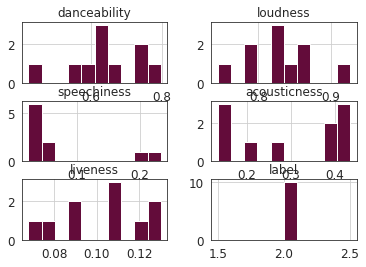

In [ ]:
songs[songs['label']==2].hist()

In [ ]:
songs[songs['label']==3].mean()

danceability    0.536833
loudness        0.878241
speechiness     0.063556
acousticness    0.037506
liveness        0.147678
label           3.000000
dtype: float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[3 0 0 0]
 [0 2 1 0]
 [0 0 4 0]
 [0 0 1 6]]


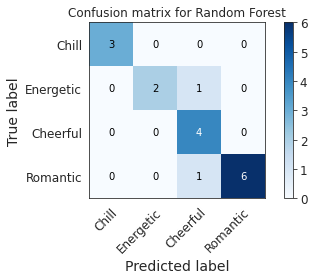

In [ ]:
definitions = ['Chill','Energetic','Cheerful','Romantic']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [ ]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.10536456857947231),
 ('loudness', 0.19504206078680653),
 ('speechiness', 0.20292670823179357),
 ('acousticness', 0.4081187205115397),
 ('liveness', 0.08854794189038782)]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_pred =knn.predict(X_test)

Confusion matrix, without normalization
[[3 0 0 0]
 [0 3 0 0]
 [1 0 3 0]
 [0 0 0 7]]


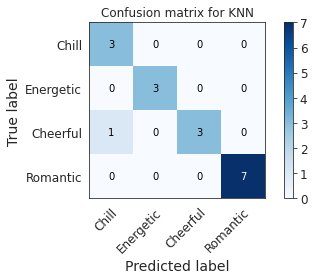

In [ ]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [ ]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[3 0 0 0]
 [0 1 0 2]
 [1 1 0 2]
 [0 0 0 7]]


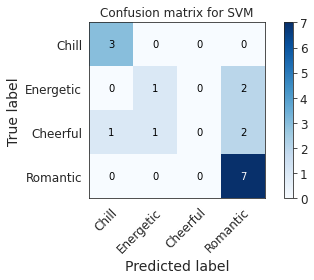

In [ ]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [ ]:
songs["new_column"] = songs['name'].str.split('\'','')
songs["new_column"] = songs['name'].str.split('[^\w\s]').str[0]
songs["new_new_column"] = songs["name"].str.split('- ').str[0]

In [ ]:
songs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label,new_column,new_new_column
35,Tere Bina,A.R. Rahman,4FeczSomVWVyU4FW7xDeAI,0.744,0.743907,0.0375,0.278000,0.0680,2,Tere Bina,Tere Bina
20,Bed Of Roses,Bon Jovi,78ApVOpB9Sq8BZWxxURWp2,0.430,0.813198,0.0256,0.137000,0.1930,3,Bed Of Roses,Bed Of Roses
26,Castle on the Hill,Ed Sheeran,66qlqxhEMpSHOzjRK4il0b,0.461,0.905702,0.0989,0.023200,0.1400,3,Castle on the Hill,Castle on the Hill
43,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,0.358,0.759247,0.0590,0.695000,0.0902,0,Say You Won,Say You Won't Let Go
8,Green Lights,NF,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.934298,0.2360,0.123000,0.1060,1,Green Lights,Green Lights
37,PAID MY DUES,NF,18czZN7uruOjftj71Kt8oj,0.812,0.943907,0.2480,0.136000,0.1090,1,PAID MY DUES,PAID MY DUES
28,One,Ed Sheeran,5TvFfDlVoUWZvfqrhTJzD7,0.464,0.543792,0.0418,0.877000,0.0789,0,One,One
17,No Excuses,NF,7ssFG94tZHpX9vbIFM0GVH,0.727,0.902981,0.0870,0.029100,0.0815,3,No Excuses,No Excuses
39,Mr. Brightside,The Killers,3n3Ppam7vgaVa1iaRUc9Lp,0.355,0.935109,0.0746,0.001190,0.0971,3,Mr,Mr. Brightside
49,Love Story,Taylor Swift,0Uc9PhfV2oP7mhXlLux6SM,0.611,0.754153,0.0308,0.076700,0.1050,3,Love Story,Love Story


In [ ]:
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_brackets
                  ]
songs['Clean Name'] = hero.clean(songs['name'], custom_pipeline)
songs['Clean Name'] = [n.replace('{','') for n in songs['Clean Name']]
songs['Clean Name'] = [n.replace('}','') for n in songs['Clean Name']]
songs['Clean Name'] = [n.replace('(','') for n in songs['Clean Name']]
songs['Clean Name'] = [n.replace(')','') for n in songs['Clean Name']]

AttributeError: ignored

In [ ]:
songs['Clean Name']

NameError: ignored

In [ ]:
def scrape_lyrics(artistname, songname):
    artistname2 = str(artistname.replace(' ','-')) if ' ' in artistname else str(artistname)
    songname2 = str(songname.replace(' ','-')) if ' ' in songname else str(songname)
    page = requests.get('https://genius.com/'+ artistname2 + '-' + songname2 + '-' + 'lyrics')
    html = BeautifulSoup(page.text, 'html.parser')
    lyrics1 = html.find("div", class_="lyrics")
    lyrics2 = html.find("div", class_="Lyrics__Container-sc-1ynbvzw-2 jgQsqn")
    if lyrics1:
        lyrics = lyrics1.get_text()
    elif lyrics2:
        lyrics = lyrics2.get_text()
    elif lyrics1 == lyrics2 == None:
        lyrics = None
    return lyrics

#function to attach lyrics onto data frame
#artist_name should be inserted as a string
def lyrics_onto_frame(df1):
    for index,row in df1.iterrows():
        test = scrape_lyrics(row['artist'], row['name'])
        df1.loc[index, 'lyrics'] = test
    return df1

In [ ]:
lyrics_onto_frame(songs)

# NLP

In [ ]:
def remove_html(text):
  soup = BeautifulSoup(text,'lxml')
  html_free = soup.get_text()
  return html_free

In [ ]:
songs['lyrics'] = songs['lyrics'].astype(str)

In [ ]:
songs['lyrics'] = songs['lyrics'].apply(lambda x: remove_html(x))

In [ ]:
songs['lyrics'] = songs['lyrics'].str.replace(r"\([^()]*\)","")

In [ ]:
songs['Clean Lyrics'] = hero.clean(songs['lyrics'])

In [ ]:
songs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label,lyrics,Clean Lyrics
35,Tere Bina,A.R. Rahman,4FeczSomVWVyU4FW7xDeAI,0.744,0.743907,0.0375,0.278000,0.0680,2,nan,nan
20,Bed Of Roses,Bon Jovi,78ApVOpB9Sq8BZWxxURWp2,0.430,0.813198,0.0256,0.137000,0.1930,3,[Verse 1]\nSitting here wasted and wounded\nAt...,verse sitting wasted wounded old piano trying ...
26,Castle on the Hill,Ed Sheeran,66qlqxhEMpSHOzjRK4il0b,0.461,0.905702,0.0989,0.023200,0.1400,3,[Verse 1]When I was six years old I broke my l...,verse six years old broke legi running brother...
43,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,0.358,0.759247,0.0590,0.695000,0.0902,0,None,none
8,Green Lights,NF,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.934298,0.2360,0.123000,0.1060,1,"[Verse 1]\nYeah \nMy name buzzin', ain't no wa...",verse yeah name buzzin way could ignore come f...
37,PAID MY DUES,NF,18czZN7uruOjftj71Kt8oj,0.812,0.943907,0.2480,0.136000,0.1090,1,"[Verse 1]Clicks, clicks, clicks, they'll do an...",verse clicks clicks clicks anything get fewtic...
28,One,Ed Sheeran,5TvFfDlVoUWZvfqrhTJzD7,0.464,0.543792,0.0418,0.877000,0.0789,0,[Verse 1]\nTell me that you'll turn down the m...,verse tell turn man asks hand cause waiting kn...
17,No Excuses,NF,7ssFG94tZHpX9vbIFM0GVH,0.727,0.902981,0.0870,0.029100,0.0815,3,"[Intro]\nYeah, I got no excuses\n\n[Chorus]\nA...",intro yeah got excuses chorus ayy yeah asked l...
39,Mr. Brightside,The Killers,3n3Ppam7vgaVa1iaRUc9Lp,0.355,0.935109,0.0746,0.001190,0.0971,3,None,none
49,Love Story,Taylor Swift,0Uc9PhfV2oP7mhXlLux6SM,0.611,0.754153,0.0308,0.076700,0.1050,3,[Verse 1]\nWe were both young when I first saw...,verse young first saw close eyes flashback sta...


In [ ]:
st = PorterStemmer()
songs['Stemmed Lyrics'] = songs['Clean Lyrics'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
#load the descriptions into textblob
text_blob = [TextBlob(desc) for desc in songs['Stemmed Lyrics']]
#add the sentiment metrics to the dataframe
songs['tb_Pol'] = [b.sentiment.polarity for b in text_blob]
songs['tb_Subj'] = [b.sentiment.subjectivity for b in text_blob]

In [ ]:
songs['Count'] = songs['Clean Lyrics'].apply(lambda x: len(str(x).split(' ')))

In [ ]:
analyzer = SentimentIntensityAnalyzer()
songs['compound'] = [analyzer.polarity_scores(x)['compound'] for x in songs['Stemmed Lyrics']]
songs['neg'] = [analyzer.polarity_scores(x)['neg'] for x in songs['Stemmed Lyrics']]
songs['neu'] = [analyzer.polarity_scores(x)['neu'] for x in songs['Stemmed Lyrics']]
songs['pos'] = [analyzer.polarity_scores(x)['pos'] for x in songs['Stemmed Lyrics']]

In [ ]:
songs

,name,artist,id,danceability,loudness,speechiness,acousticness,liveness,label,lyrics,Clean Lyrics,Stemmed Text,Stemmed Lyrics,tb_Pol,tb_Subj,Count,compound,neg,neu,pos
35,Tere Bina,A.R. Rahman,4FeczSomVWVyU4FW7xDeAI,0.744,0.743907,0.0375,0.278000,0.0680,2,nan,nan,nan,nan,0.000000,0.000000,1,0.0000,0.000,1.000,0.000
20,Bed Of Roses,Bon Jovi,78ApVOpB9Sq8BZWxxURWp2,0.430,0.813198,0.0256,0.137000,0.1930,3,[Verse 1]\nSitting here wasted and wounded\nAt...,verse sitting wasted wounded old piano trying ...,vers sit wast wound old piano tri hard captur ...,vers sit wast wound old piano tri hard captur ...,0.183333,0.634028,186,0.5574,0.135,0.693,0.173
26,Castle on the Hill,Ed Sheeran,66qlqxhEMpSHOzjRK4il0b,0.461,0.905702,0.0989,0.023200,0.1400,3,[Verse 1]When I was six years old I broke my l...,verse six years old broke legi running brother...,vers six year old broke legi run brother frien...,vers six year old broke legi run brother frien...,0.050000,0.323611,94,0.8860,0.103,0.712,0.185
43,Say You Won't Let Go,James Arthur,5uCax9HTNlzGybIStD3vDh,0.358,0.759247,0.0590,0.695000,0.0902,0,None,none,none,none,0.000000,0.000000,1,0.0000,0.000,1.000,0.000
8,Green Lights,NF,0MvqSYPr5Wi62JB7VWvqwz,0.735,0.934298,0.2360,0.123000,0.1060,1,"[Verse 1]\nYeah \nMy name buzzin', ain't no wa...",verse yeah name buzzin way could ignore come f...,vers yeah name buzzin way could ignor come far...,vers yeah name buzzin way could ignor come far...,0.123839,0.462061,236,0.9949,0.035,0.713,0.252
37,PAID MY DUES,NF,18czZN7uruOjftj71Kt8oj,0.812,0.943907,0.2480,0.136000,0.1090,1,"[Verse 1]Clicks, clicks, clicks, they'll do an...",verse clicks clicks clicks anything get fewtic...,vers click click click anyth get fewtick tick ...,vers click click click anyth get fewtick tick ...,0.092014,0.421181,170,0.9093,0.078,0.791,0.131
28,One,Ed Sheeran,5TvFfDlVoUWZvfqrhTJzD7,0.464,0.543792,0.0418,0.877000,0.0789,0,[Verse 1]\nTell me that you'll turn down the m...,verse tell turn man asks hand cause waiting kn...,vers tell turn man ask hand caus wait know gon...,vers tell turn man ask hand caus wait know gon...,-0.333333,0.833333,131,0.9886,0.101,0.610,0.288
17,No Excuses,NF,7ssFG94tZHpX9vbIFM0GVH,0.727,0.902981,0.0870,0.029100,0.0815,3,"[Intro]\nYeah, I got no excuses\n\n[Chorus]\nA...",intro yeah got excuses chorus ayy yeah asked l...,intro yeah got excus choru ayi yeah ask learn ...,intro yeah got excus choru ayi yeah ask learn ...,0.034495,0.470051,274,0.9970,0.086,0.603,0.310
39,Mr. Brightside,The Killers,3n3Ppam7vgaVa1iaRUc9Lp,0.355,0.935109,0.0746,0.001190,0.0971,3,None,none,none,none,0.000000,0.000000,1,0.0000,0.000,1.000,0.000
49,Love Story,Taylor Swift,0Uc9PhfV2oP7mhXlLux6SM,0.611,0.754153,0.0308,0.076700,0.1050,3,[Verse 1]\nWe were both young when I first saw...,verse young first saw close eyes flashback sta...,vers young first saw close eye flashback start...,vers young first saw close eye flashback start...,0.122368,0.456579,185,0.9614,0.059,0.801,0.140


In [ ]:
songs['tb_Pol'].mean()

0.07507963862453561

In [ ]:
songs['compound'].mean()

0.3802539999999999

In [ ]:
words = songs["lyrics"].str.cat(sep=' ').lower()
len(words)

84732

In [ ]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(words)
print(tokens)

['[', 'verse', '1', ']', 'sitting', 'here', 'wasted', 'and', 'wounded', 'at', 'this', 'old', 'piano', 'trying', 'hard', 'to', 'capture', 'the', 'moment', 'this', 'morning', 'i', 'do', "n't", 'know', 'cause', 'a', 'bottle', 'of', 'vodka', 'is', 'still', 'lodged', 'in', 'my', 'head', 'and', 'some', 'blonde', 'gave', 'me', 'nightmares', 'i', 'think', 'that', 'she', "'s", 'still', 'in', 'my', 'bed', 'as', 'i', 'dream', 'about', 'movies', 'they', 'wo', "n't", 'make', 'of', 'me', 'when', 'i', "'m", 'dead', 'with', 'an', 'ironclad', 'fist', 'i', 'wake', 'up', 'and', 'french', 'kiss', 'the', 'morning', 'while', 'some', 'marching', 'band', 'keeps', 'its', 'own', 'beat', 'in', 'my', 'head', 'while', 'we', "'re", 'talking', 'about', 'all', 'of', 'the', 'things', 'that', 'i', 'long', 'to', 'believe', 'about', 'love', 'and', 'the', 'truth', 'and', 'what', 'you', 'mean', 'to', 'me', 'and', 'the', 'truth', 'is', 'baby', 'you', "'re", 'all', 'that', 'i', 'need', '...', '[', 'chorus', ']', 'i', 'want',

In [ ]:
alpha_tokens = [word for word in tokens if word.isalpha()]
print(alpha_tokens)

['verse', 'sitting', 'here', 'wasted', 'and', 'wounded', 'at', 'this', 'old', 'piano', 'trying', 'hard', 'to', 'capture', 'the', 'moment', 'this', 'morning', 'i', 'do', 'know', 'cause', 'a', 'bottle', 'of', 'vodka', 'is', 'still', 'lodged', 'in', 'my', 'head', 'and', 'some', 'blonde', 'gave', 'me', 'nightmares', 'i', 'think', 'that', 'she', 'still', 'in', 'my', 'bed', 'as', 'i', 'dream', 'about', 'movies', 'they', 'wo', 'make', 'of', 'me', 'when', 'i', 'dead', 'with', 'an', 'ironclad', 'fist', 'i', 'wake', 'up', 'and', 'french', 'kiss', 'the', 'morning', 'while', 'some', 'marching', 'band', 'keeps', 'its', 'own', 'beat', 'in', 'my', 'head', 'while', 'we', 'talking', 'about', 'all', 'of', 'the', 'things', 'that', 'i', 'long', 'to', 'believe', 'about', 'love', 'and', 'the', 'truth', 'and', 'what', 'you', 'mean', 'to', 'me', 'and', 'the', 'truth', 'is', 'baby', 'you', 'all', 'that', 'i', 'need', 'chorus', 'i', 'want', 'to', 'lay', 'you', 'down', 'in', 'a', 'bed', 'of', 'roses', 'for', 'to

In [ ]:
from nltk.corpus import stopwords
sr = stopwords.words('english')
clean_tokens = alpha_tokens[:]
for token in alpha_tokens:
    if token in sr:
        clean_tokens.remove(token)

In [ ]:
len(clean_tokens)

8007

verse:74
sitting:1
wasted:2
wounded:1
old:15
piano:1
trying:3
hard:8
capture:1
moment:6
morning:4
know:118
cause:17
bottle:1
vodka:1
still:22
lodged:1
head:11
blonde:1
gave:3
nightmares:1
think:45
bed:15
dream:1
movies:1
wo:21
make:29
dead:4
ironclad:1
fist:1
wake:4
french:1
kiss:6
marching:1
band:1
keeps:1
beat:7
talking:1
things:18
long:8
believe:17
love:78
truth:5
mean:10
baby:53
need:25
chorus:89
want:74
lay:13
roses:8
tonight:24
sleep:13
nails:4
oh:142
close:19
holy:4
ghost:5
well:16
far:10
away:21
step:3
take:63
way:55
home:22
king:1
ransom:1
dimes:1
given:1
night:25
see:56
payphone:1
run:4
time:44
get:50
till:2
bird:1
wire:1
flies:3
back:37
eyes:32
whisper:2
blind:1
true:2
hotel:3
bar:3
hangover:1
whiskey:1
gone:9
dry:3
barkeeper:1
wig:1
crooked:1
giving:1
eye:3
might:7
said:31
yeah:180
laughed:1
died:1
guitar:3
solo:3
thinking:4
mistress:1
calls:2
stand:1
spotlight:1
alone:60
lonely:2
got:73
nothing:8
prove:1
die:14
defend:1
six:4
years:7
broke:2
leg:1
running:2
brother:4
frien

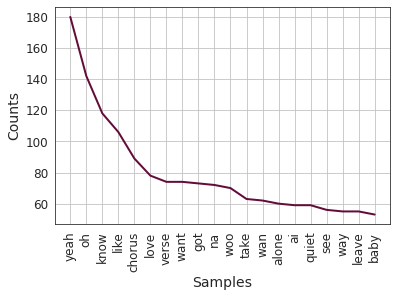

In [ ]:
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False)

In [ ]:
freq.tabulate(3)

yeah   oh know 
 180  142  118 


In [ ]:
finder_1 = nltk.collocations.BigramCollocationFinder.from_words(clean_tokens)
finder_2 = nltk.collocations.TrigramCollocationFinder.from_words(clean_tokens)
print(finder_1.ngram_fd.most_common(10))
print(finder_2.ngram_fd.most_common(5))

[(('wan', 'na'), 62), (('oh', 'oh'), 55), (('yeah', 'yeah'), 50), (('quiet', 'quiet'), 41), (('leave', 'alone'), 41), (('want', 'body'), 28), (('fulfillin', 'destiny'), 23), (('woo', 'woo'), 18), (('isis', 'isis'), 18), (('body', 'want'), 17)]
[(('yeah', 'yeah', 'yeah'), 37), (('oh', 'oh', 'oh'), 34), (('quiet', 'quiet', 'quiet'), 26), (('want', 'body', 'want'), 17), (('body', 'want', 'body'), 17)]


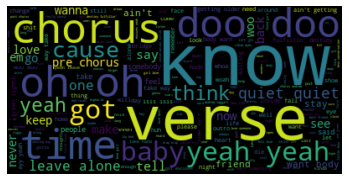

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(words)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# New Section

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

In [ ]:
def get_album_tracks(uri_info):
    uri = []
    track = []
    duration = []
    explicit = []
    track_number = []
    one = sp.album_tracks(uri_info, limit=50, offset=0, market='US')
    df1 = pd.DataFrame(one)
    
    for i, x in df1['items'].items():
        uri.append(x['uri'])
        track.append(x['name'])
        duration.append(x['duration_ms'])
        explicit.append(x['explicit'])
        track_number.append(x['track_number'])
    
    df2 = pd.DataFrame({
    'uri':uri,
    'track':track,
    'duration_ms':duration,
    'explicit':explicit,
    'track_number':track_number})
    
    return df2

In [ ]:
get_album_tracks("spotify:playlist:37i9dQZF1EM7GTUqUC3OPU")

Expected id of type album but found type playlist spotify:playlist:37i9dQZF1EM7GTUqUC3OPU
HTTP Error for GET to https://api.spotify.com/v1/albums/37i9dQZF1EM7GTUqUC3OPU/tracks/ returned 404 due to non existing id


SpotifyException: ignored

In [ ]:
scope = 'user-library-read playlist-modify-public playlist-read-private'

client_credentials_manager = SpotifyClientCredentials(client_id = cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager= client_credentials_manager)

token = util.prompt_for_user_token(username,scope,cid,secret,redirect_uri)

if token:
  sp = spotipy.Spotify(auth=token)
  
else:
  print("Can't get token for", username)

In [ ]:
playlist_df = playlist_df[["id", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness",  "key", "liveness", "loudness", "mode", "speechiness", "tempo", "valence"]]

In [ ]:
playlist_df.shape

# Using LyricsGenius

In [ ]:
pip install lyricsgenius

     |████████████████████████████████| 61kB 2.9MB/s 


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import lyricsgenius as genius

In [ ]:
client_id = 'Qir1kGzz125PsnqqL1iDb91nJFMSE50AR5jN2vB_aH0BkJh41ZZ6XCkuJ0UmRlgb'
client_secret = "HEt6ZGjqAnmbmL4VfnHiY04u2XtZ7-7Bbeetw4QBcYHHz-6LeFMCAfHc0dK3hk42-CnHmYsbOzuA"
client_access_token = 'HEt6ZGjqAnmbmL4VfnHiY04u2XtZ7-7Bbeetw4QBcYHHz-6LeFMCAfHc0dK3hk42'
artist_name = "Eminem"

In [ ]:
api = genius.Genius(client_access_token)
artist = api.search_artist(artist_name, max_songs=5)
artist.save_lyrics()

Searching for songs by Eminem...

Song 1: "Rap God"
Song 2: "Killshot"
Song 3: "Godzilla"
Song 4: "Lose Yourself"
Song 5: "The Monster"

Reached user-specified song limit (5).
Done. Found 5 songs.
Wrote Lyrics_Eminem.json.


In [ ]:
import pandas as pd
artist_data = pd.read_json(f"Lyrics_{artist_name}.json")

ValueError: ignored

In [ ]:
a = {'Links' : lines ,'Titles' : titles , 'Singers': finalsingers , 'Albums':finalalbums , 'Years' : years}
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

# Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
negative = []
neutral = []
positive = []
compound = []#Initialize the model
sid = SentimentIntensityAnalyzer()
#Iterate for each row of lyrics and append the scoresfor i in df.index:
scores = sid.polarity_scores(songs['lyrics'].iloc[i])
negative.append(scores['neg'])
neutral.append(scores['neu'])
positive.append(scores['pos'])
compound.append(scores['compound'])
#Create 4 columns to the main data frame  for each score
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compounddf.head

NameError: ignored